1. Deep learning method apply
2. Peramiter tuning, model optimisation
3. xai (Best model)

In [1]:
import pandas as pd

data = pd.read_excel("archive/Supplementary data 1.xlsx")
data.head()

,SUBJECT_ID,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,...,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
0,1,3.58\t,19.36,47,45.4,56.0,11.0,24.0,0.01,0.30,...,76.2,0.09,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4
1,2,34.24\t,23.98,61,39.9,95.0,9.0,13.0,0.02,0.30,...,76.5,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2
2,3,1.50\t,18.40,39,45.4,77.0,9.0,18.0,0.03,0.60,...,69.7,0.13,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2
3,4,2.75,16.60,45,39.2,26.0,16.0,17.0,0.05,0.74,...,65.5,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6
4,5,2.36,19.97,45,35.0,47.0,21.0,27.0,0.01,0.10,...,59.5,0.28,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0


In [2]:
data.shape

(349, 51)

## Pre-Processing Data
#### Check Null value. If found Null-value manage null value using different technique.

In [3]:
# check null value, 
data.isnull().sum()

SUBJECT_ID      0
AFP            22
AG              1
Age             0
ALB            10
ALP            10
ALT            10
AST            10
BASO#           0
BASO%           0
BUN             0
Ca              0
CA125          17
CA19-9         24
CA72-4        240
CEA            22
CL              0
CO2CP           1
CREA            0
TYPE            0
DBIL           10
EO#             0
EO%             0
GGT            10
GLO            10
GLU.            0
HCT             0
HE4            20
HGB             0
IBIL           10
K               0
LYM#            0
LYM%            0
MCH             0
MCV             0
Menopause       0
Mg              0
MONO#           0
MONO%           0
MPV             2
Na              0
NEU            91
PCT             2
PDW             2
PHOS            0
PLT             0
RBC             0
RDW             0
TBIL           10
TP             10
UA              0
dtype: int64

In [4]:
# This column data type is object and here instance 22 so, 
ObjectColumnName = ['AFP','AG', 'Age','CA125','CA19-9']

def ObjectNullValueRecover(columnName):
    for cn in columnName:
            data[cn] = data[cn].astype(str).str.replace('\t', '', regex=False)
            data[cn] = pd.to_numeric(data[cn],errors='coerce')
            data[cn] = data[cn].fillna(data[cn].mean())

ObjectNullValueRecover(ObjectColumnName)

In [5]:
# Neumecial Column Remove Null Value, 
neumerical_Column = ['AG', 'ALB','ALP','ALT','AST','CEA','CO2CP','DBIL','GGT','GLO','HE4','IBIL','MPV','NEU','TBIL','TP','PCT','PDW']

def nullValueRecover_Neumeric(columnName):
    for cn in columnName:
        data[cn] = data[cn].fillna(data[cn].mean())


nullValueRecover_Neumeric(neumerical_Column)

In [6]:
# Drop Column 
data = data.drop(columns=['CA72-4']) # 240 null values found!

In [7]:
def checkColumnDetails(columnName):
    print(f"Data Type : {data[columnName].dtype}")
    print(f"Null Value : {data[columnName].isnull().sum()}")
    print(f"Data Unique : {data[columnName].unique()}")
    print(f"Value Counts : {data[columnName].value_counts()}")

checkColumnDetails('PDW')

Data Type : float64
Null Value : 0
Data Unique : [13.4        11.2        15.2        17.4        11.9        19.1
 16.8        15.1        16.9         8.8        10.4        20.2
 11.         16.5        11.8        16.1        12.7        13.7
 10.6        17.3        12.1        11.4        15.5        15.4
 18.65       17.9        14.1        11.7        17.2        18.8
 17.         14.3        10.2         9.9        20.47        8.9
 18.2        16.3        20.6        13.1        17.1        16.7
 10.1        18.         13.3        16.08       13.5        14.2
 10.9        11.5        15.7        10.3        14.6        12.3
 17.5        16.4        16.22       22.5        10.7         9.3
 22.8        22.         16.2        16.52       12.8        14.9
 14.7        14.5        19.6        18.67       11.3        10.5
 21.6        19.3        17.6        12.4        20.4        12.6
 18.1        16.06       18.9        17.7        18.4        13.8
 12.2        14.4        16

In [8]:
data.isnull().sum()

SUBJECT_ID    0
AFP           0
AG            0
Age           0
ALB           0
ALP           0
ALT           0
AST           0
BASO#         0
BASO%         0
BUN           0
Ca            0
CA125         0
CA19-9        0
CEA           0
CL            0
CO2CP         0
CREA          0
TYPE          0
DBIL          0
EO#           0
EO%           0
GGT           0
GLO           0
GLU.          0
HCT           0
HE4           0
HGB           0
IBIL          0
K             0
LYM#          0
LYM%          0
MCH           0
MCV           0
Menopause     0
Mg            0
MONO#         0
MONO%         0
MPV           0
Na            0
NEU           0
PCT           0
PDW           0
PHOS          0
PLT           0
RBC           0
RDW           0
TBIL          0
TP            0
UA            0
dtype: int64

#### Check Outliers and Manage

Outliers found in column: AG
Outliers found in column: ALB
Outliers found in column: ALP
Outliers found in column: ALT
Outliers found in column: AST
Outliers found in column: CEA
Outliers found in column: CO2CP
Outliers found in column: DBIL
Outliers found in column: GGT
Outliers found in column: GLO
Outliers found in column: HE4
Outliers found in column: IBIL
Outliers found in column: MPV
Outliers found in column: NEU
Outliers found in column: TBIL
Outliers found in column: TP
Outliers found in column: PCT


/var/folders/h1/x8cfj9p51559f3t05mnh0kh40000gn/T/ipykernel_40244/4059311238.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data[col] for col in outlier_columns], labels=outlier_columns, vert=False)


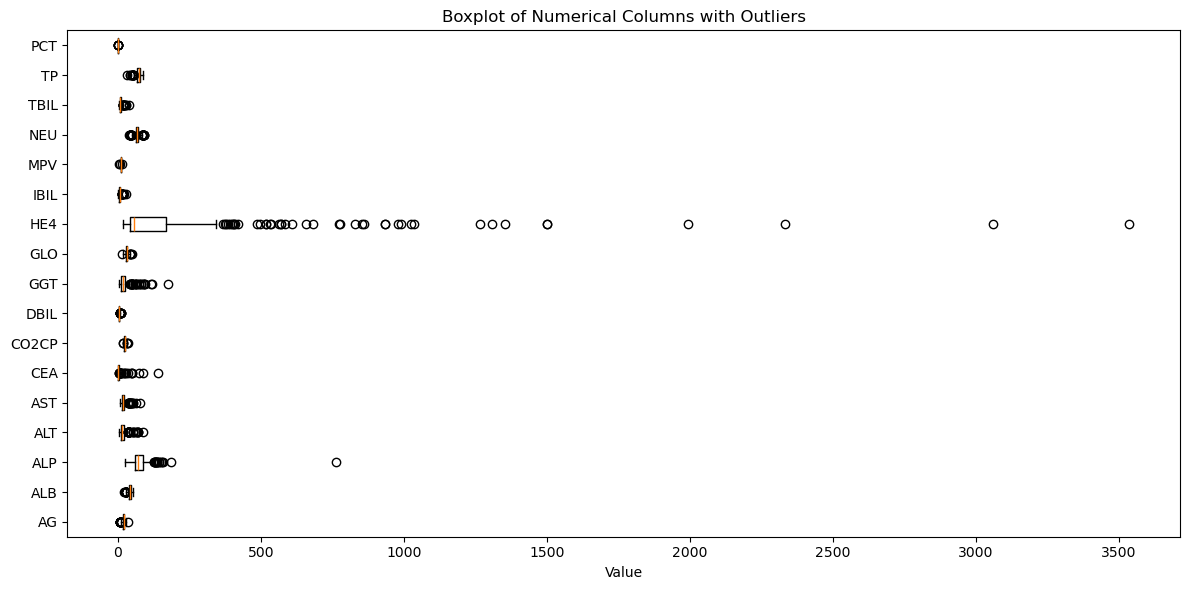

In [9]:
import matplotlib.pyplot as plt

# Check for outliers in all numerical columns and plot boxplots
outlier_columns = []
for col in neumerical_Column:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)][col]
    if not outliers.empty:
        outlier_columns.append(col)
        print(f"Outliers found in column: {col}")

if outlier_columns:
    plt.figure(figsize=(12, 6))
    plt.boxplot([data[col] for col in outlier_columns], labels=outlier_columns, vert=False)
    plt.title("Boxplot of Numerical Columns with Outliers")
    plt.xlabel("Value")
    plt.tight_layout()
    plt.show()
else:
    print("No outlier values found in the specified numerical columns.")

🔎 Outlier Fix Summary:
 - AFP: 14 outliers clipped
 - AG: 18 outliers clipped
 - Age: 0 outliers clipped
 - ALB: 14 outliers clipped
 - ALP: 17 outliers clipped
 - ALT: 26 outliers clipped
 - AST: 18 outliers clipped
 - BASO#: 6 outliers clipped
 - BASO%: 3 outliers clipped
 - BUN: 7 outliers clipped
 - Ca: 22 outliers clipped
 - CA125: 36 outliers clipped
 - CA19-9: 31 outliers clipped
 - CEA: 22 outliers clipped
 - CL: 15 outliers clipped
 - CO2CP: 5 outliers clipped
 - CREA: 7 outliers clipped
 - DBIL: 15 outliers clipped
 - EO#: 18 outliers clipped
 - EO%: 19 outliers clipped
 - GGT: 27 outliers clipped
 - GLO: 6 outliers clipped
 - GLU.: 25 outliers clipped
 - HCT: 11 outliers clipped
 - HE4: 43 outliers clipped
 - HGB: 18 outliers clipped
 - IBIL: 11 outliers clipped
 - K: 5 outliers clipped
 - LYM#: 11 outliers clipped
 - LYM%: 0 outliers clipped
 - MCH: 23 outliers clipped
 - MCV: 18 outliers clipped
 - Menopause: 0 outliers clipped
 - Mg: 9 outliers clipped
 - MONO#: 12 outlie

/var/folders/h1/x8cfj9p51559f3t05mnh0kh40000gn/T/ipykernel_40244/829592848.py:41: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


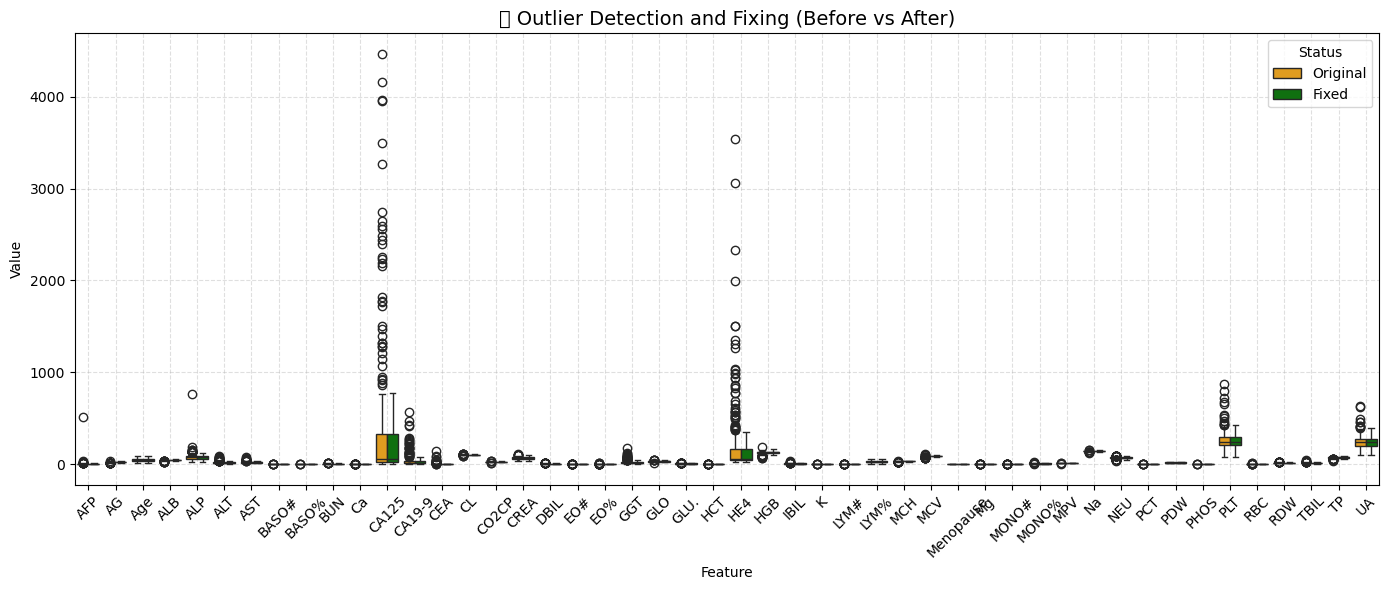

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


numeric_data = data.drop(columns=['SUBJECT_ID', 'TYPE'], errors='ignore').select_dtypes(include='number')

def fix_outliers(df):
    df_fixed = df.copy()
    print("🔎 Outlier Fix Summary:")
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower) | (df[col] > upper)).sum()
        print(f" - {col}: {outliers} outliers clipped")
        df_fixed[col] = df[col].clip(lower=lower, upper=upper)
    return df_fixed


clean_data = fix_outliers(numeric_data)


original_melted = numeric_data.melt(var_name='Feature', value_name='Value')
original_melted['Status'] = 'Original'

clean_melted = clean_data.melt(var_name='Feature', value_name='Value')
clean_melted['Status'] = 'Fixed'

combined = pd.concat([original_melted, clean_melted])


plt.figure(figsize=(14, 6))
sns.boxplot(data=combined, x='Feature', y='Value', hue='Status', palette=['orange', 'green'])
plt.title('📦 Outlier Detection and Fixing (Before vs After)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


#### Minimum Std

In [11]:
std_value = data.std()
min_std = std_value.min()
min_std

0.020889981607336388

#### Find out the co-relation 

In [12]:
corelation_matrix = data.corr()
corelation_matrix

,SUBJECT_ID,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,...,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
SUBJECT_ID,1.000000,-0.053726,-0.223562,-0.303549,0.360036,-0.028274,-0.041450,0.043268,-0.115879,-0.119144,...,-0.083568,-0.004874,-0.188852,0.075400,-0.133168,0.072167,-0.177337,0.326093,0.165034,0.097824
AFP,-0.053726,1.000000,0.001376,-0.067084,-0.044923,-0.001158,-0.032422,-0.046518,0.057212,0.019615,...,0.043276,-0.033702,0.042568,-0.070700,0.023939,-0.063648,-0.002340,-0.037671,-0.028534,-0.021459
AG,-0.223562,0.001376,1.000000,-0.102935,0.038828,0.096989,-0.006762,-0.175076,-0.073324,-0.069036,...,0.009155,0.098177,0.006430,0.036321,0.089273,0.133202,-0.077394,-0.075884,0.119752,0.010216
Age,-0.303549,-0.067084,-0.102935,1.000000,-0.266651,0.170280,0.077371,0.303679,-0.040091,-0.116684,...,0.295981,0.161953,-0.109876,-0.047021,0.139641,-0.083455,0.006485,-0.019380,-0.139461,0.127121
ALB,0.360036,-0.044923,0.038828,-0.266651,1.000000,-0.050732,-0.011328,-0.010820,-0.093903,0.001915,...,-0.272719,-0.231197,-0.042275,0.120844,-0.357401,0.333235,-0.152500,0.301526,0.747566,0.048807
ALP,-0.028274,-0.001158,0.096989,0.170280,-0.050732,1.000000,0.047240,0.161830,-0.008726,-0.030086,...,0.136636,0.132581,-0.064841,-0.013317,0.108665,0.142704,0.000626,0.147249,0.024815,0.041906
ALT,-0.041450,-0.032422,-0.006762,0.077371,-0.011328,0.047240,1.000000,0.614124,0.105313,0.067857,...,-0.084291,-0.094783,0.182953,-0.029805,-0.042308,0.091006,0.102443,0.102270,0.078685,0.095093
AST,0.043268,-0.046518,-0.175076,0.303679,-0.010820,0.161830,0.614124,1.000000,-0.074399,-0.138474,...,0.103903,0.158979,-0.123439,0.070838,0.101103,0.106996,0.024579,0.164019,0.042017,0.166936
BASO#,-0.115879,0.057212,-0.073324,-0.040091,-0.093903,-0.008726,0.105313,-0.074399,1.000000,0.853284,...,-0.159931,-0.039397,0.337207,-0.033329,0.135617,0.160975,0.278580,-0.036532,-0.083696,0.021282
BASO%,-0.119144,0.019615,-0.069036,-0.116684,0.001915,-0.030086,0.067857,-0.138474,0.853284,1.000000,...,-0.385200,-0.221634,0.384694,0.011404,-0.051076,0.078685,0.277433,-0.046242,-0.012624,-0.039726


In [13]:
data

,SUBJECT_ID,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,...,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
0,1,3.58,19.36,47,45.4,56.0,11.0,24.0,0.01,0.30,...,76.200000,0.09,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4
1,2,34.24,23.98,61,39.9,95.0,9.0,13.0,0.02,0.30,...,76.500000,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2
2,3,1.50,18.40,39,45.4,77.0,9.0,18.0,0.03,0.60,...,69.700000,0.13,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2
3,4,2.75,16.60,45,39.2,26.0,16.0,17.0,0.05,0.74,...,65.500000,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6
4,5,2.36,19.97,45,35.0,47.0,21.0,27.0,0.01,0.10,...,59.500000,0.28,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,410,2.09,20.91,52,48.6,65.0,40.0,30.0,0.00,0.00,...,66.575543,0.22,10.8,0.99,219,4.56,11.9,10.7,80.4,241.5
345,411,2.00,12.14,37,46.1,49.0,9.0,20.0,0.00,0.00,...,66.575543,0.31,17.3,0.95,262,4.24,17.7,17.2,73.5,240.5
346,412,2.83,19.23,59,45.8,83.0,9.0,16.0,0.02,0.60,...,66.575543,0.21,10.4,1.00,221,4.89,11.6,13.8,68.4,209.5
347,413,1.84,27.22,30,47.8,64.0,26.0,22.0,0.03,0.30,...,66.575543,0.42,13.4,1.31,398,5.35,12.5,11.3,76.0,285.7


In [14]:
from sklearn.model_selection import train_test_split

x = data.drop(columns=['SUBJECT_ID','TYPE'])
y = data['TYPE']


x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2)

print("Traing x Data Shape: ", x_train.shape)
print("Training y Data Shape : ", y_train.shape)
print("Testing x Data Shape: ", x_test.shape)
print("Testing y Data Shape: ", y_test.shape)

Traing x Data Shape:  (279, 48)
Training y Data Shape :  (279,)
Testing x Data Shape:  (70, 48)
Testing y Data Shape:  (70,)


#### Build Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, input_shape=(x_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') 
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train, epochs=100,batch_size=32)

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5154 - loss: 13.8477  
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7840 - loss: 1.5515
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7433 - loss: 0.8183
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8847 - loss: 0.5617
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8286 - loss: 0.5101
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8185 - loss: 0.3745
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8925 - loss: 0.3100
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8173 - loss: 0.4714
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8977 - loss: 0.3410
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8807 - loss: 0.3368
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9011 - loss: 0.3028
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9214 - loss: 0.2665
Epoch 13/1

#### Parameter Tuning & Model Optimization

In [55]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=128, step=16),
        activation='relu',
        input_shape=(x_train.shape[1],)
    ))

    model.add(Dense(
        units=hp.Int('units_2', min_value=16, max_value=64, step=16),
        activation='relu'
    ))

    model.add(Dense(1, activation='sigmoid'))  

    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model



tuner = kt.RandomSearch(
    build_model,  
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='tuning'
)

tuner.search(x_train, y_train, validation_split=0.2, epochs=100)
best_model = tuner.get_best_models(num_models=1)[0]

Trial 10 Complete [00h 00m 04s]
val_accuracy: 0.8392857313156128

Best val_accuracy So Far: 0.8392857313156128
Total elapsed time: 00h 00m 37s


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


#### XAI (Explainable AI) – SHAP for Best Model

296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 180us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 199us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step
295/295 ━━━

PermutationExplainer explainer:  29%|██▊       | 20/70 [00:00<?, ?it/s]

293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step


PermutationExplainer explainer:  31%|███▏      | 22/70 [00:10<00:12,  3.94it/s]

292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step


PermutationExplainer explainer:  33%|███▎      | 23/70 [00:11<00:16,  2.78it/s]

296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step


PermutationExplainer explainer:  34%|███▍      | 24/70 [00:11<00:19,  2.36it/s]

292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step


PermutationExplainer explainer:  36%|███▌      | 25/70 [00:12<00:20,  2.21it/s]

297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step


PermutationExplainer explainer:  37%|███▋      | 26/70 [00:12<00:20,  2.10it/s]

293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step


PermutationExplainer explainer:  39%|███▊      | 27/70 [00:13<00:21,  2.03it/s]

293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step


PermutationExplainer explainer:  40%|████      | 28/70 [00:13<00:20,  2.01it/s]

298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step


PermutationExplainer explainer:  41%|████▏     | 29/70 [00:14<00:20,  1.99it/s]

297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step


PermutationExplainer explainer:  43%|████▎     | 30/70 [00:15<00:20,  1.97it/s]

293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step


PermutationExplainer explainer:  44%|████▍     | 31/70 [00:15<00:20,  1.94it/s]

294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step


PermutationExplainer explainer:  46%|████▌     | 32/70 [00:16<00:19,  1.94it/s]

296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step


PermutationExplainer explainer:  47%|████▋     | 33/70 [00:16<00:19,  1.93it/s]

297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step


PermutationExplainer explainer:  49%|████▊     | 34/70 [00:17<00:18,  1.91it/s]

296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step


PermutationExplainer explainer:  50%|█████     | 35/70 [00:17<00:18,  1.92it/s]

294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step


PermutationExplainer explainer:  51%|█████▏    | 36/70 [00:18<00:17,  1.92it/s]

295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step


PermutationExplainer explainer:  53%|█████▎    | 37/70 [00:18<00:17,  1.93it/s]

294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step


PermutationExplainer explainer:  54%|█████▍    | 38/70 [00:19<00:16,  1.91it/s]

291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step


PermutationExplainer explainer:  56%|█████▌    | 39/70 [00:19<00:16,  1.91it/s]

296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step


PermutationExplainer explainer:  57%|█████▋    | 40/70 [00:20<00:15,  1.91it/s]

294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step


PermutationExplainer explainer:  59%|█████▊    | 41/70 [00:20<00:15,  1.92it/s]

291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step


PermutationExplainer explainer:  60%|██████    | 42/70 [00:21<00:14,  1.91it/s]

298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step


PermutationExplainer explainer:  61%|██████▏   | 43/70 [00:21<00:14,  1.91it/s]

295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step


PermutationExplainer explainer:  63%|██████▎   | 44/70 [00:22<00:13,  1.91it/s]

291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step


PermutationExplainer explainer:  64%|██████▍   | 45/70 [00:22<00:13,  1.89it/s]

294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step


PermutationExplainer explainer:  66%|██████▌   | 46/70 [00:23<00:13,  1.84it/s]

294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step


PermutationExplainer explainer:  67%|██████▋   | 47/70 [00:24<00:12,  1.81it/s]

294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step


PermutationExplainer explainer:  69%|██████▊   | 48/70 [00:24<00:12,  1.79it/s]

295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step


PermutationExplainer explainer:  70%|███████   | 49/70 [00:25<00:11,  1.83it/s]

295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step


PermutationExplainer explainer:  71%|███████▏  | 50/70 [00:25<00:10,  1.86it/s]

295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step


PermutationExplainer explainer:  73%|███████▎  | 51/70 [00:26<00:10,  1.88it/s]

296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step


PermutationExplainer explainer:  74%|███████▍  | 52/70 [00:26<00:09,  1.87it/s]

294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step


PermutationExplainer explainer:  76%|███████▌  | 53/70 [00:27<00:09,  1.88it/s]

294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step


PermutationExplainer explainer:  77%|███████▋  | 54/70 [00:27<00:08,  1.89it/s]

294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step


PermutationExplainer explainer:  79%|███████▊  | 55/70 [00:28<00:07,  1.88it/s]

296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step


PermutationExplainer explainer:  80%|████████  | 56/70 [00:28<00:07,  1.83it/s]

291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step


PermutationExplainer explainer:  81%|████████▏ | 57/70 [00:29<00:07,  1.81it/s]

296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 199us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step


PermutationExplainer explainer:  83%|████████▎ | 58/70 [00:30<00:06,  1.78it/s]

296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step


PermutationExplainer explainer:  84%|████████▍ | 59/70 [00:30<00:06,  1.77it/s]

295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step


PermutationExplainer explainer:  86%|████████▌ | 60/70 [00:31<00:05,  1.75it/s]

294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step


PermutationExplainer explainer:  87%|████████▋ | 61/70 [00:31<00:05,  1.76it/s]

295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step


PermutationExplainer explainer:  89%|████████▊ | 62/70 [00:32<00:04,  1.78it/s]

295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step


PermutationExplainer explainer:  90%|█████████ | 63/70 [00:32<00:03,  1.82it/s]

293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step


PermutationExplainer explainer:  91%|█████████▏| 64/70 [00:33<00:03,  1.84it/s]

294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 180us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step


PermutationExplainer explainer:  93%|█████████▎| 65/70 [00:33<00:02,  1.84it/s]

291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step


PermutationExplainer explainer:  94%|█████████▍| 66/70 [00:34<00:02,  1.83it/s]

294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step


PermutationExplainer explainer:  96%|█████████▌| 67/70 [00:35<00:01,  1.81it/s]

296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step


PermutationExplainer explainer:  97%|█████████▋| 68/70 [00:35<00:01,  1.78it/s]

295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step


PermutationExplainer explainer:  99%|█████████▊| 69/70 [00:36<00:00,  1.77it/s]

296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 199us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step


PermutationExplainer explainer: 100%|██████████| 70/70 [00:36<00:00,  1.77it/s]

294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step


PermutationExplainer explainer: 71it [00:37,  1.37it/s]                        
/var/folders/h1/x8cfj9p51559f3t05mnh0kh40000gn/T/ipykernel_40244/2153987730.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, x_test[:100], feature_names=x.columns)


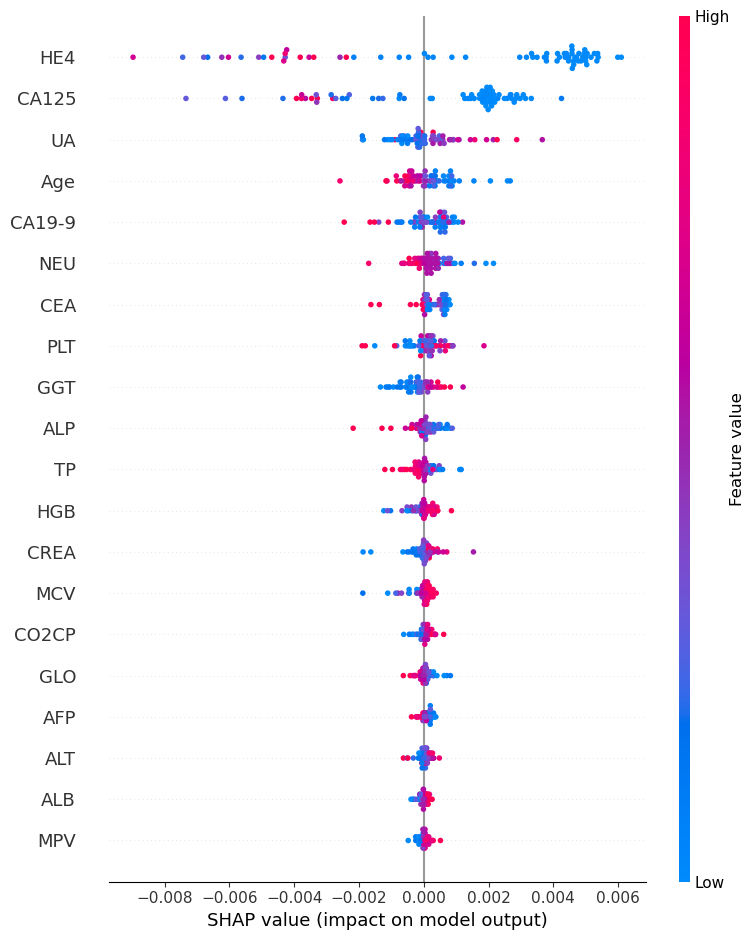

In [62]:
import shap

explainer = shap.Explainer(model.predict, x_train)
shap_values = explainer(x_test[:100])

shap.summary_plot(shap_values, x_test[:100], feature_names=x.columns)